## Linear regression algorithms
### Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets as data
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

### Load sample dataset

In [2]:
# Load sample data for regression
diabetes_X, diabetes_y = data.load_diabetes(return_X_y=True)
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Create train/test splits
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = \
    train_test_split(diabetes_X, diabetes_y, test_size=0.20, random_state=42)

### Instantiate algorithms

In [3]:
linear_regression = linear_model.LinearRegression()
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()


### Fit algorithms

In [4]:
linear_regression.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred_lin_reg = linear_regression.predict(diabetes_X_test)

lasso.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred_lasso = lasso.predict(diabetes_X_test)

ridge.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred_ridge = ridge.predict(diabetes_X_test)


### Plot regression fits on the data
- Plot the train and test data points in different colors.
- Plot the regression lines based on ONLY the train data

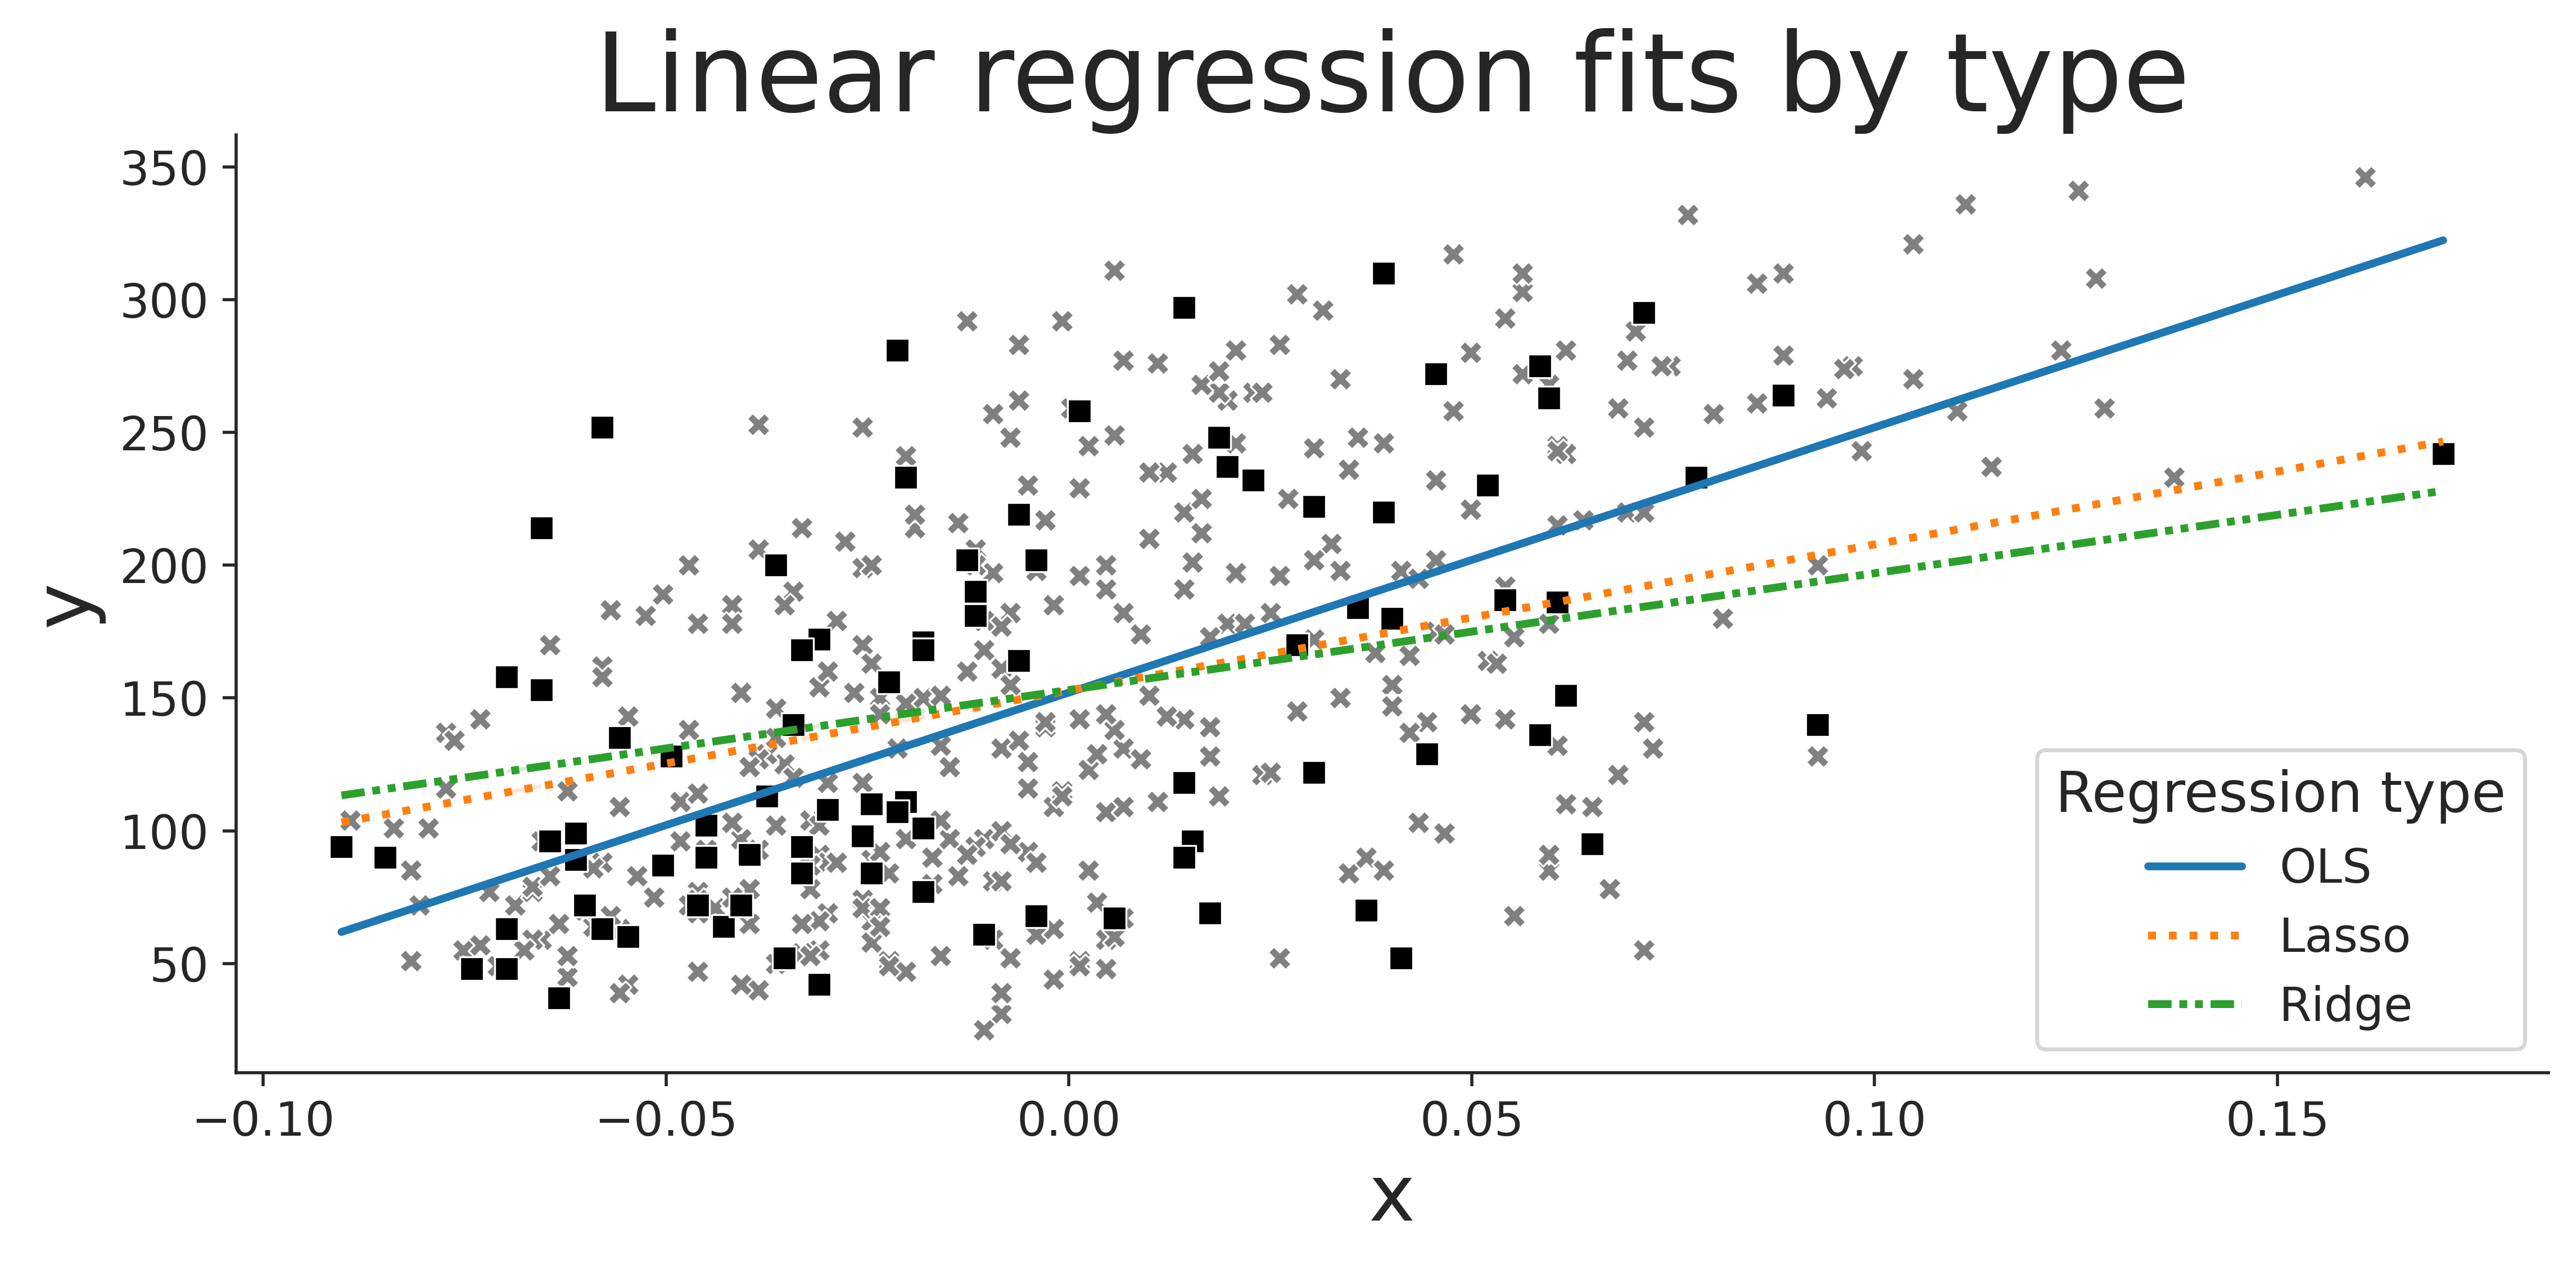

In [5]:
# Initialize plot
with sns.axes_style("ticks"):
    plt.rcParams['legend.title_fontsize'] = 'x-large'
    fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
    plt.tight_layout(pad=5.0)
    plt.title("Linear regression fits by type", fontsize=28)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    sns.scatterplot(x=[x[0] for x in diabetes_X_train],
                    y=diabetes_y_train, color="grey", marker="X")
    sns.scatterplot(x=[x[0] for x in diabetes_X_test],
                    y=diabetes_y_test, color="black", marker="s")

    predictions = [diabetes_y_pred_lin_reg,
                   diabetes_y_pred_lasso, diabetes_y_pred_ridge]
    _styles = ["solid", "dotted",
               (0, (3, 1, 1, 1, 1, 1)), "dashed", "dashdot", (0, (3, 5, 1, 5))]

    for i, algo in enumerate(["OLS", "Lasso", "Ridge"]):
        sns.lineplot(x=[x[0] for x in diabetes_X_test], y=predictions[i],
                     label=algo, linestyle=_styles[i], linewidth=2)

    ax.set_ylabel('y', fontsize=20)
    ax.set_xlabel('x', fontsize=20)
    ax.legend(title="Regression type", fontsize=12)
    sns.despine(offset=0, trim=False, left=False)

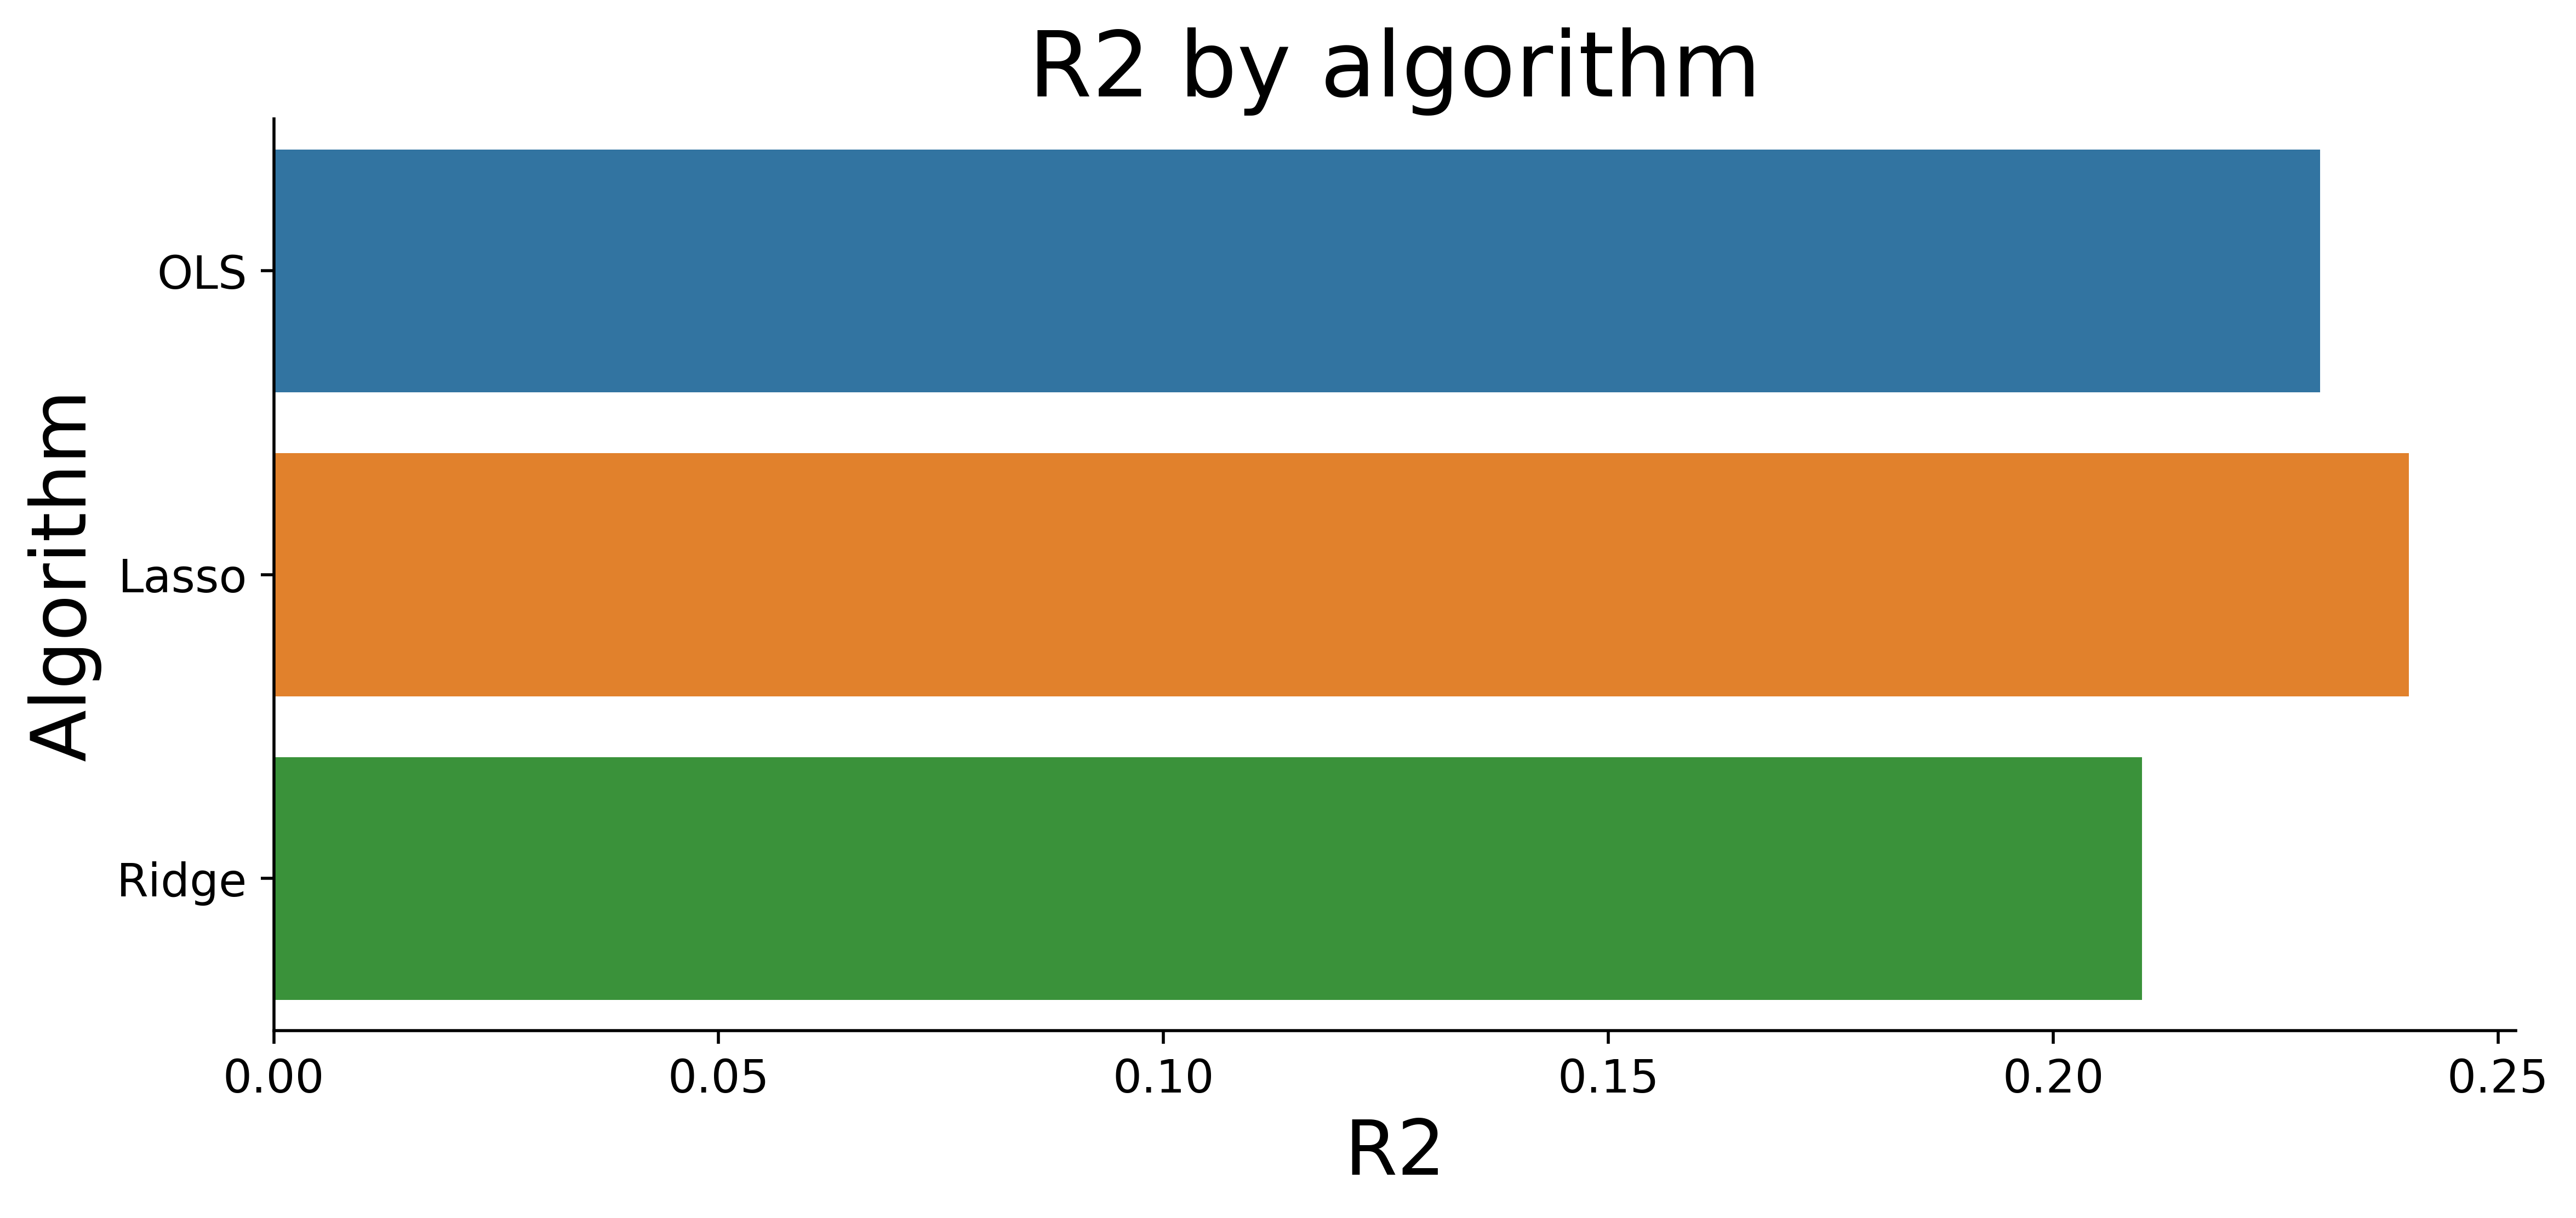

In [6]:
r2_scores = []

r2_scores.append(["OLS", round(linear_regression.score(diabetes_X_test, diabetes_y_test), 2)])
r2_scores.append(["Lasso", round(lasso.score(diabetes_X_test, diabetes_y_test), 2)])
r2_scores.append(
    ["Ridge", round(ridge.score(diabetes_X_test, diabetes_y_test), 2)])

df = pd.DataFrame(r2_scores, columns=["algo", "r2"])

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
plt.tight_layout(pad=5.0)
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.title("R2 by algorithm", fontsize=24)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

sns.barplot(data=df, x="r2", y="algo", orient="h")

ax.set_xlabel('R2', fontsize=20)
ax.set_ylabel('Algorithm', fontsize=20)

sns.despine(offset=0, trim=False, left=False)


In [7]:
round(linear_regression.score(diabetes_X_test, diabetes_y_test), 2)
r2_scores

[['OLS', 0.23], ['Lasso', 0.24], ['Ridge', 0.21]]

### Scores using 10-fold cross-validation

In [13]:
res_linear_regression = cross_validate(
    linear_regression, diabetes_X, diabetes_y, cv=10, scoring=('r2'))
res_lasso = cross_validate(
    lasso, diabetes_X, diabetes_y, cv=10, scoring=('r2'))
res_ridge = cross_validate(
    ridge, diabetes_X, diabetes_y, cv=10, scoring=('r2'))


### Visualize data

In [9]:
res_lasso.keys()


dict_keys(['fit_time', 'score_time', 'test_score'])

In [14]:
np.mean(res_linear_regression["test_score"])


0.302446485542614

In [15]:
np.mean(res_lasso["test_score"])


0.23044285047693344

In [16]:
np.mean(res_ridge["test_score"])

0.21134700998972838